In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("spam.csv",encoding="cp1252")

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [6]:
df.shape

(5572, 2)

In [67]:
#to check for duplicate values
df.drop_duplicates(inplace=True)
print(df.shape)
#%loss in data is 7%

(5169, 2)


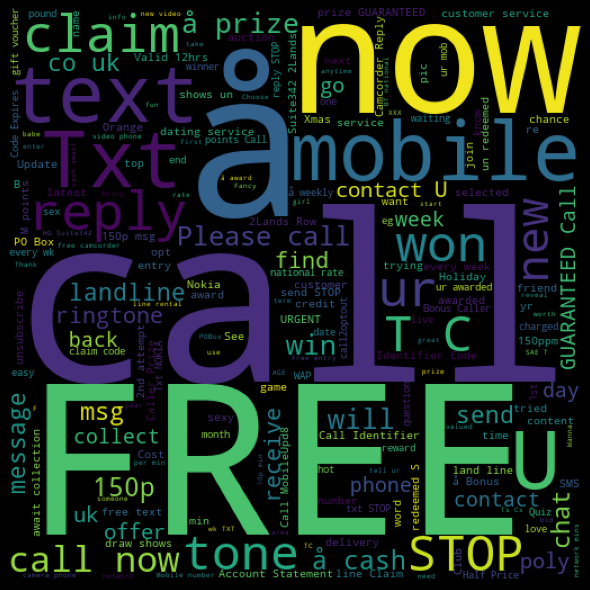

In [9]:
#Visualising the most repeated words in the spam messages

spam_word=''.join(list(df[df["v1"]=="spam"]["v2"]))
spam_wc=WordCloud(width=512,height=512).generate(spam_word)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

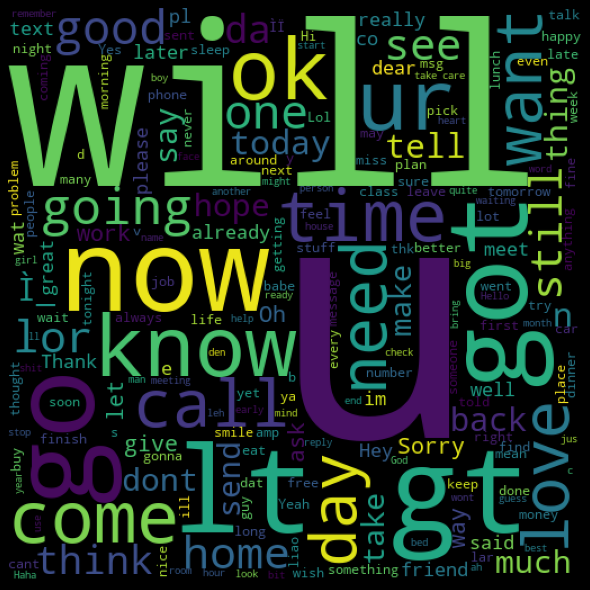

In [10]:
#Repeated words for genuine messages

spam_word=''.join(list(df[df["v1"]=="ham"]["v2"]))
spam_wc=WordCloud(width=512,height=512).generate(spam_word)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<AxesSubplot:ylabel='v1'>

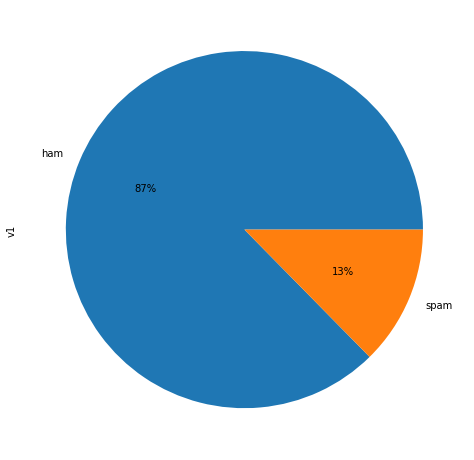

In [11]:
#The result shows that 13% of all the messages are spam while 87% of the messages are ham.

plt.rcParams["figure.figsize"] = [8,10] 
df.v1.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [12]:
#Let’s plot the histogram of messages with respect to the number of words for both ham and spam messages.
#number of words in ham messages and their count of occurrence in the dataset:

dataset_ham=df[df['v1'] == "ham"]
dataset_ham_count = dataset_ham['v2'].str.split().str.len()
dataset_ham_count.index=dataset_ham_count.index.astype(str) + ' words:'
dataset_ham_count.sort_index(inplace=True)



In [13]:
#number of words in spam messages, and there counts of occurrence in the dataset:

dataset_spam=df[df['v1'] == "spam"]
dataset_spam_count=dataset_spam['v2'].str.split().str.len()
dataset_spam_count.index = dataset_spam_count.index.astype(str) + ' words:'
dataset_spam_count.sort_index(inplace=True)


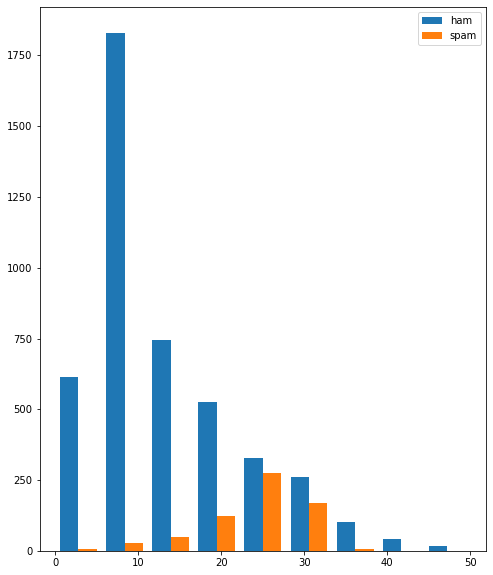

In [14]:
#The output shows that most of the ham messages contain 0 to 10 words 
#while the majority of spam messages are longer and contain between 20 to 30 words.

bins = np.linspace(0, 50, 10)

plt.hist([dataset_ham_count, dataset_spam_count], bins, label=['ham', 'spam'])
plt.legend(loc='upper right')
plt.show()

In [8]:
#download the stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
#A function was defined to clean the text and return the tokens
def process(text):
    np=[char for char in text if char not in string.punctuation]
    np=''.join(np)

    clean=[word for word in np.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['v2'].head().apply(process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: v2, dtype: object

In [10]:
#Encoding the categorical feature-'type'
df_encode=pd.get_dummies(data=df['v1'],drop_first=True)
df_new=df.drop('v1',axis=1)
df_new=df_new.join(df_encode)
df_new

,v2,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [11]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec=TfidfVectorizer(max_features=10000,stop_words='english')
features=tf_vec.fit_transform(df['v2'])
x=features

In [12]:
X=x.toarray()

In [13]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score

In [14]:
lr=LogisticRegression()
rf=RandomForestClassifier()
kn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
dt=DecisionTreeClassifier(criterion='entropy')
gb=GaussianNB()
lst=[lr,rf,kn,sv,dt,gb]

In [17]:
#Creating a loop to decide the best random state number for model development
#From the below results, the Random Forest Classifier with random state 0 has the best result compared to other models
#with an accuracy score of 0.98 in testing data and 1 in training data
for i1 in lst:
    for i2 in range(0,4):
        x_train,x_test,y_train,y_test=train_test_split(X,df_new["spam"],random_state=i2,test_size=0.25)
        i1.fit(x_train,y_train)
        pred_test=i1.predict(x_test)
        pred_train=i1.predict(x_train)
        print("Model",i1,"Random State-",i2,"Accuracy Score-Test",round(accuracy_score(y_test,pred_test),2),"Accuracy Score-Train",round(accuracy_score(y_train,pred_train),2),"F1 score-train",round(f1_score(y_train,pred_train),2),"F1 score -test",round(f1_score(y_test,pred_test),2))

Model LogisticRegression() Random State- 0 Accuracy Score-Test 0.95 Accuracy Score-Train 0.96 F1 score-train 0.81 F1 score -test 0.75
Model LogisticRegression() Random State- 1 Accuracy Score-Test 0.93 Accuracy Score-Train 0.96 F1 score-train 0.83 F1 score -test 0.64
Model LogisticRegression() Random State- 2 Accuracy Score-Test 0.94 Accuracy Score-Train 0.96 F1 score-train 0.81 F1 score -test 0.72
Model LogisticRegression() Random State- 3 Accuracy Score-Test 0.94 Accuracy Score-Train 0.96 F1 score-train 0.81 F1 score -test 0.74
Model RandomForestClassifier() Random State- 0 Accuracy Score-Test 0.98 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 0.9
Model RandomForestClassifier() Random State- 1 Accuracy Score-Test 0.97 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 0.86
Model RandomForestClassifier() Random State- 2 Accuracy Score-Test 0.98 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 0.89
Model RandomForestClassifier() Random State- 3 Accuracy S

# Random Forest Classifier

In [18]:
m1=rf.fit(x_train,y_train)
pred_train=m1.predict(x_train)
pred_test=m1.predict(x_test)

In [19]:
print(round(accuracy_score(y_train,pred_train),2)*100)

100.0


In [20]:
print(round(accuracy_score(y_test,pred_test),2)*100)

97.0


In [21]:
print(round(f1_score(y_train,pred_train),2)*100)

100.0


In [22]:
print(round(f1_score(y_test,pred_test),2)*100)

88.0


In [23]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1111
           1       1.00      0.79      0.88       182

    accuracy                           0.97      1293
   macro avg       0.98      0.89      0.93      1293
weighted avg       0.97      0.97      0.97      1293



In [24]:
print(confusion_matrix(y_test,pred_test))

[[1111    0]
 [  39  143]]


# Cross Validation Score of the model

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m1,X,df_new["spam"], scoring='accuracy', cv=cv)

In [28]:
print(round(cv1.mean(),2)*100)

97.0


# Hyperparameter Tuning 

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
rf=RandomForestClassifier()

In [31]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
param_dist={"max_depth": [30,40,50,60,70,80],"criterion": ["gini", "entropy","log_loss"]}

In [55]:
samples=7  # number of random samples 
randomCV=RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=samples,cv=3)

In [56]:
final=randomCV.fit(x_train,y_train)

In [57]:
print(final.best_params_)

{'max_depth': 70, 'criterion': 'gini'}


In [58]:
pred1=final.predict(x_test)
pred2=final.predict(x_train)

In [59]:
print(round(accuracy_score(y_train,pred2),2)*100)

99.0


In [60]:
print(round(accuracy_score(y_test,pred1),2)*100)

97.0


In [61]:
print(round(f1_score(y_train,pred2),2)*100)

97.0


In [62]:
print(round(f1_score(y_test,pred1),2)*100)

88.0


In [63]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1111
           1       1.00      0.79      0.88       182

    accuracy                           0.97      1293
   macro avg       0.98      0.90      0.93      1293
weighted avg       0.97      0.97      0.97      1293



In [64]:
print(confusion_matrix(y_test,pred1))
#After performing hyperparameter tuning the False Negative is reduced from 39 to 38 and True Negative is increased from 143 to 144


[[1111    0]
 [  38  144]]


# Saving the model

In [65]:
import pickle
pickle.dump(final, open('Spam', 'wb'))

In [66]:
pickled_model=pickle.load(open('Spam', 'rb'))
pickled_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)